[*********************100%%**********************]  1 of 1 completed


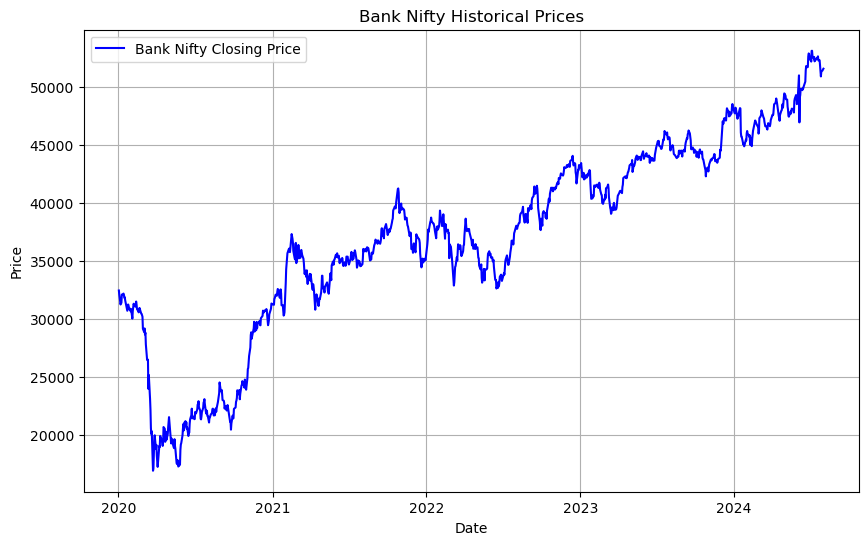

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
bank_nifty = yf.download("^NSEBANK", start="2020-01-01", 
end="2024-08-01")
plt.figure(figsize=(10, 6))
plt.plot(bank_nifty.index, bank_nifty['Close'], label='Bank Nifty Closing Price', color='blue')
plt.title("Bank Nifty Historical Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend() 
plt.grid(True)
plt.show()


In [3]:
import yfinance as yf
import numpy as np
import pandas as pd
banks = ["HDFCBANK.NS", "ICICIBANK.NS"]
data = yf.download(banks, start="2023-01-01", end="2024-08-01")['Close']
dmt_df = pd.DataFrame(index=data.index)
bank_returns = data.pct_change()
dmt_df['DMT'] = bank_returns.mean(axis=1)
dmt_df['DMT_Smoothed'] = dmt_df['DMT'].rolling(window=14).mean()
dmt_df['Min'] = dmt_df['DMT_Smoothed'].rolling(window=5, center=True).apply(lambda x: 
x.argmin(), raw=True)
dmt_df['Max'] = dmt_df['DMT_Smoothed'].rolling(window=5, center=True).apply(lambda x: 
x.argmax(), raw=True)
threshold = 0.02 * dmt_df['DMT_Smoothed'].std()
significant_maxima = dmt_df['DMT_Smoothed'] >dmt_df['DMT_Smoothed'].rolling(window=5, 
center=True).max() - threshold
significant_minima = dmt_df['DMT_Smoothed'] <dmt_df['DMT_Smoothed'].rolling(window=5, 
center=True).min() + threshold
print("Significant Maxima Dates:\n", dmt_df.index[significant_maxima])
print("Significant Minima Dates:\n", dmt_df.index[significant_minima])

[*********************100%%**********************]  2 of 2 completed

Significant Maxima Dates:
 DatetimeIndex(['2023-01-24', '2023-02-06', '2023-02-16', '2023-02-27',
               '2023-03-03', '2023-03-17', '2023-03-22', '2023-04-06',
               '2023-04-12', '2023-04-24', '2023-05-02', '2023-05-12',
               '2023-05-19', '2023-05-29', '2023-06-06', '2023-06-13',
               '2023-06-14', '2023-06-22', '2023-07-03', '2023-07-06',
               '2023-07-17', '2023-07-20', '2023-08-01', '2023-08-08',
               '2023-08-18', '2023-08-24', '2023-09-15', '2023-09-26',
               '2023-10-17', '2023-10-23', '2023-10-30', '2023-11-16',
               '2023-11-21', '2023-12-05', '2023-12-11', '2023-12-14',
               '2023-12-21', '2023-12-28', '2024-01-15', '2024-01-24',
               '2024-01-31', '2024-02-09', '2024-02-22', '2024-03-01',
               '2024-03-13', '2024-03-14', '2024-03-21', '2024-04-09',
               '2024-04-19', '2024-04-29', '2024-05-07', '2024-05-17',
               '2024-06-03', '2024-06-11', '2024-0

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  2 of 2 completed


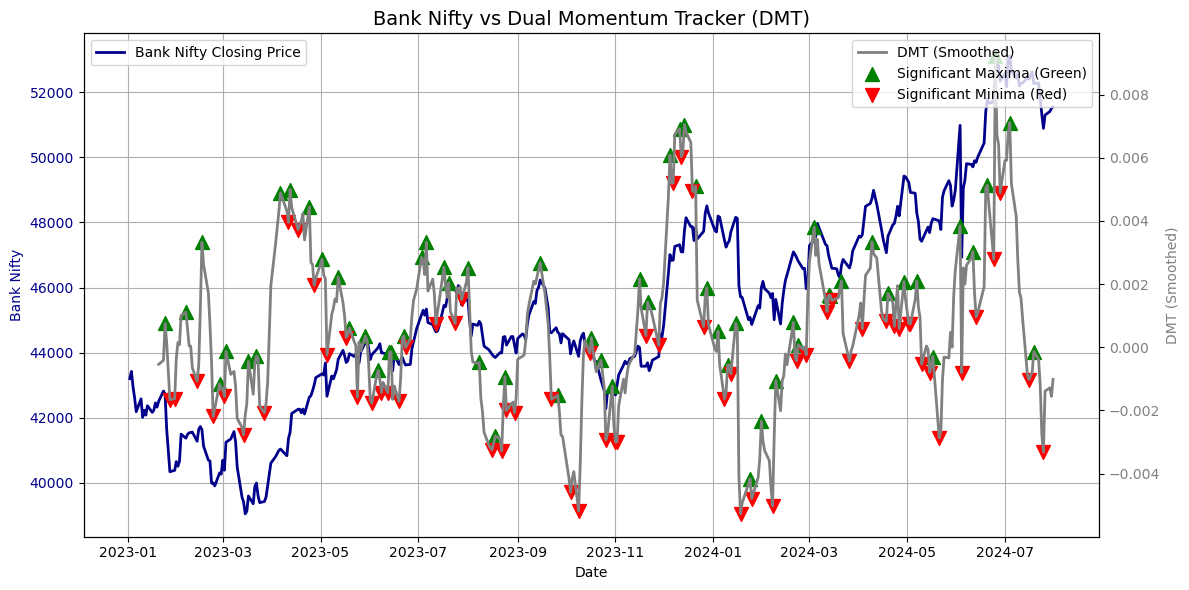

In [4]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
banks = ["HDFCBANK.NS", "ICICIBANK.NS"]
bank_nifty = yf.download("^NSEBANK", start="2023-01-01", end="2024-08-01")['Close']
data = yf.download(banks, start="2023-01-01", end="2024-08-01")['Close']
dmt_df = pd.DataFrame(index=bank_nifty.index)
bank_returns = data.pct_change()
dmt_df['DMT'] = bank_returns.mean(axis=1)
dmt_df['DMT_Smoothed'] = dmt_df['DMT'].rolling(window=14).mean()
dmt_df['Min'] = dmt_df['DMT_Smoothed'].rolling(window=5, center=True).apply(lambda x: 
x.argmin(), raw=True)
dmt_df['Max'] = dmt_df['DMT_Smoothed'].rolling(window=5, center=True).apply(lambda x:
x.argmax(), raw=True)
threshold = 0.02 * dmt_df['DMT_Smoothed'].std()
significant_maxima = dmt_df['DMT_Smoothed'] >dmt_df['DMT_Smoothed'].rolling(window=5, 
center=True).max() - threshold
significant_minima = dmt_df['DMT_Smoothed'] <dmt_df['DMT_Smoothed'].rolling(window=5, 
center=True).min() + threshold
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.set_xlabel('Date')
ax1.set_ylabel('Bank Nifty', color='darkblue')
ax1.plot(bank_nifty.index, bank_nifty, color='darkblue', label='Bank Nifty Closing Price', 
linewidth=2)
ax1.tick_params(axis='y', labelcolor='darkblue')
ax2 = ax1.twinx()
ax2.set_ylabel('DMT (Smoothed)', color='grey')
ax2.plot(dmt_df.index, dmt_df['DMT_Smoothed'], color='grey', label='DMT (Smoothed)', 
linewidth=2)
ax2.tick_params(axis='y', labelcolor='grey')
ax2.scatter(dmt_df.index[significant_maxima], dmt_df['DMT_Smoothed'][significant_maxima], 
color='green', marker='^', s=100, label='Significant Maxima (Green)')
ax2.scatter(dmt_df.index[significant_minima], dmt_df['DMT_Smoothed'][significant_minima], 
color='red', marker='v', s=100, label='Significant Minima (Red)')
plt.title('Bank Nifty vs Dual Momentum Tracker (DMT)', fontsize=14)
ax1.grid(True)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
fig.tight_layout()
plt.show()